In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np




In [2]:
day_import = pd.read_csv('day.csv')
hour_import = pd.read_csv('hour.csv')

In [51]:
day=day_import.copy()


day.loc[day['holiday'] == 0, 'is_holiday'] = 'No'
day.loc[day['holiday'] == 1, 'is_holiday'] = 'Yes'




day.loc[day['workingday'] == 0, 'is_workday'] = 'No'
day.loc[day['workingday'] == 1, 'is_workday'] = 'Yes'

day.loc[day['season'] == 1, 'season'] = 'Winter'
day.loc[day['season'] == 2, 'season'] = 'Spring'
day.loc[day['season'] == 3, 'season'] = 'Summer'
day.loc[day['season'] == 4, 'season'] = 'Fall'

day['dteday']= pd.to_datetime(day['dteday'])

day['atemp']=day['atemp']*(50+16)-16 #(t-t_min)/(t_max-t_min), t_min=-16, t_max=+50

# we are creating a new column called "temp_label", we define a range and associate that range with a label
day['temp_label'] = day['atemp'].apply(lambda value: 'cold'
if value <= 10 else 'warm'
if value <= 30 else 'hot')




print(day.describe())



          instant               dteday          yr        mnth     holiday  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    0.500684    6.519836    0.028728   
min      1.000000  2011-01-01 00:00:00    0.000000    1.000000    0.000000   
25%    183.500000  2011-07-02 12:00:00    0.000000    4.000000    0.000000   
50%    366.000000  2012-01-01 00:00:00    1.000000    7.000000    0.000000   
75%    548.500000  2012-07-01 12:00:00    1.000000   10.000000    0.000000   
max    731.000000  2012-12-31 00:00:00    1.000000   12.000000    1.000000   
std    211.165812                  NaN    0.500342    3.451913    0.167155   

          weekday  workingday  weathersit        temp       atemp         hum  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     2.997264    0.683995    1.395349    0.495385   15.307363    0.627894   
min      0.000000    0.000000    1.000000    0.059130 

/tmp/ipykernel_10194/1319606886.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'No' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  day.loc[day['holiday'] == 0, 'is_holiday'] = 'No'
/tmp/ipykernel_10194/1319606886.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'No' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  day.loc[day['workingday'] == 0, 'is_workday'] = 'No'
/tmp/ipykernel_10194/1319606886.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Winter' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  day.loc[day['season'] == 1, 'season'] = 'Winter'


In [52]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,is_holiday,is_workday,temp_label
0,1,2011-01-01,Winter,0,1,0,6,0,2,0.344167,7.999250,0.805833,0.160446,331,654,985,No,No,cold
1,2,2011-01-02,Winter,0,1,0,0,0,2,0.363478,7.346774,0.696087,0.248539,131,670,801,No,No,cold
2,3,2011-01-03,Winter,0,1,0,1,1,1,0.196364,-3.499270,0.437273,0.248309,120,1229,1349,No,Yes,cold
3,4,2011-01-04,Winter,0,1,0,2,1,1,0.200000,-1.999948,0.590435,0.160296,108,1454,1562,No,Yes,cold
4,5,2011-01-05,Winter,0,1,0,3,1,1,0.226957,-0.868180,0.436957,0.186900,82,1518,1600,No,Yes,cold


## Visualise

Text(0.5, 0, 'Month')

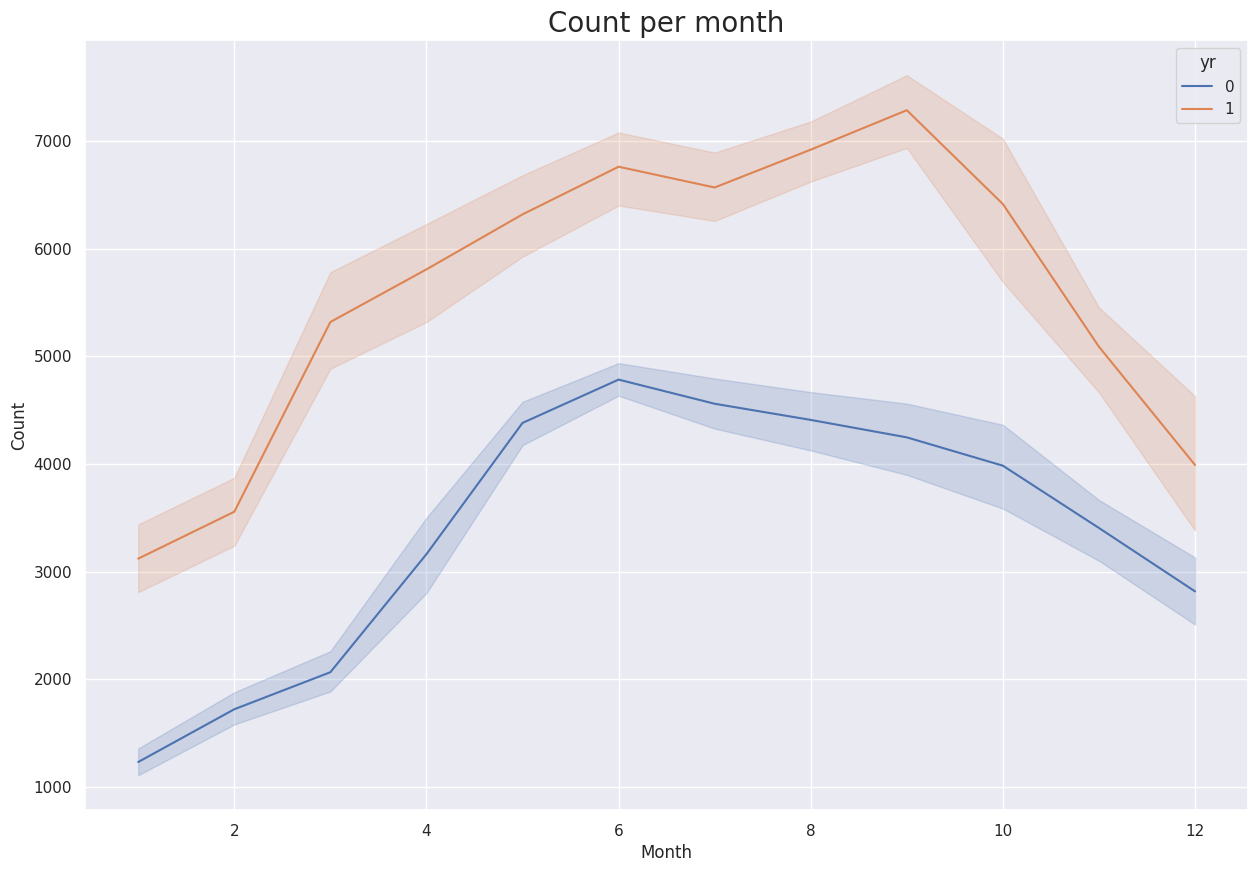

In [53]:
sns.lineplot(x='mnth',y='cnt' , data=day, hue='yr' )
plt.title('Count per month',  fontsize='20')
plt.ylabel("Count")
plt.xlabel("Month")

Text(0.5, 0, 'Year')

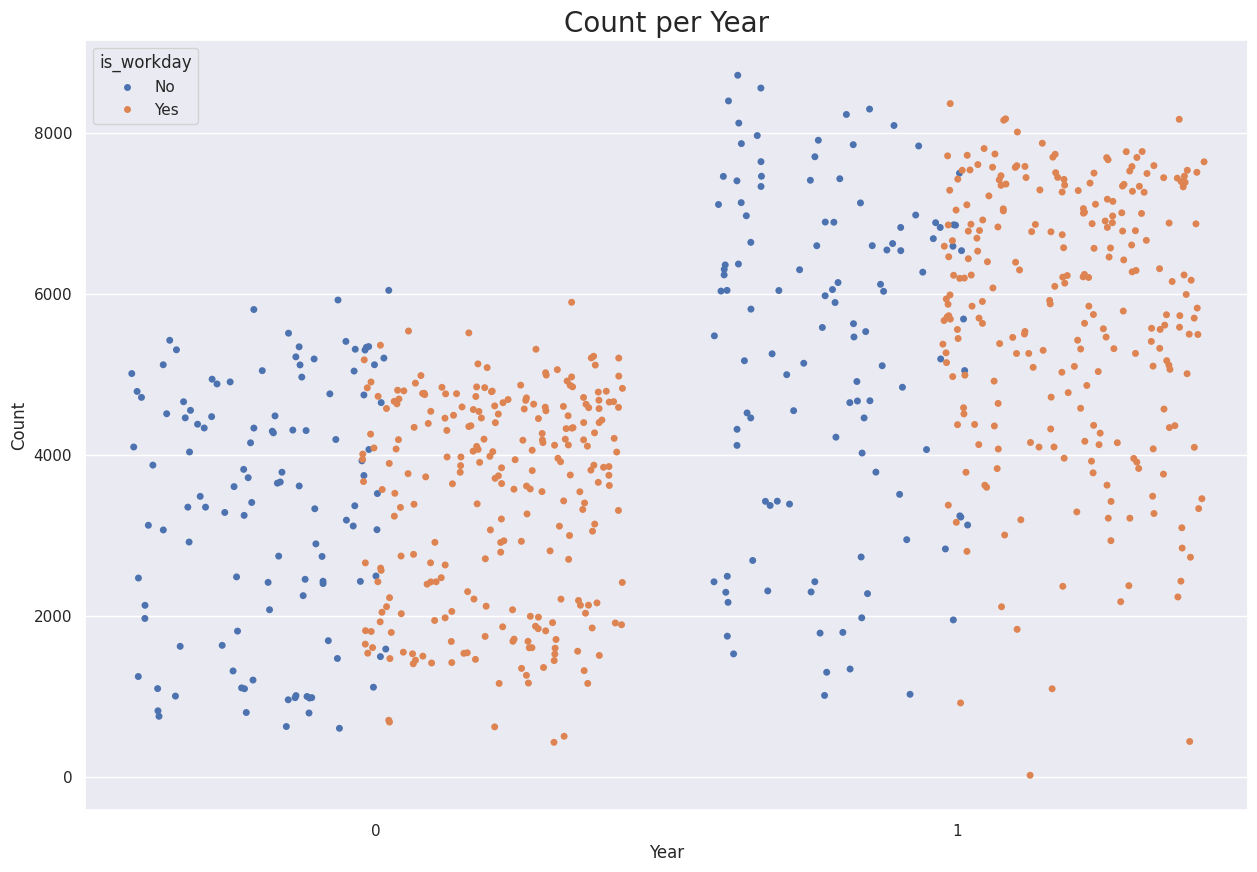

In [54]:
sns.stripplot(data=day, x='yr', y='cnt', jitter=0.45,  hue='is_workday', dodge=True) 
plt.title('Count per Year',  fontsize='20')
plt.ylabel("Count")
plt.xlabel("Year")

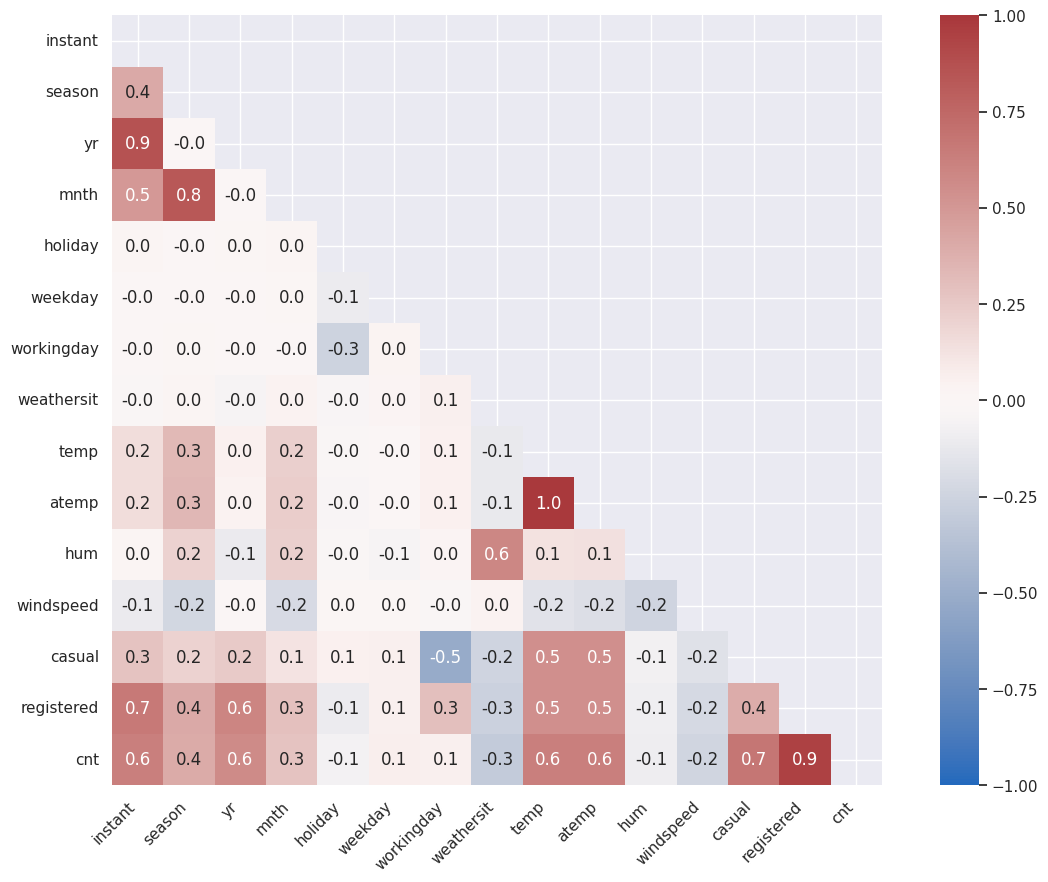

In [55]:
day_heatmap=day_import.copy()



if 'dteday' in day_heatmap:
    day_heatmap=day_heatmap.drop(labels='dteday', axis=1)

mask = np.triu(np.ones_like(day_heatmap.corr()))

ax=sns.heatmap(
    day_heatmap.corr(), 
    annot=True,fmt=".1f",
    square=True,
    mask=mask,
     cmap='vlag',
    vmin = -1,
    vmax = 1
)


ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
sns.set(rc = {'figure.figsize':(15,10)})

<Axes: xlabel='mnth', ylabel='cnt'>

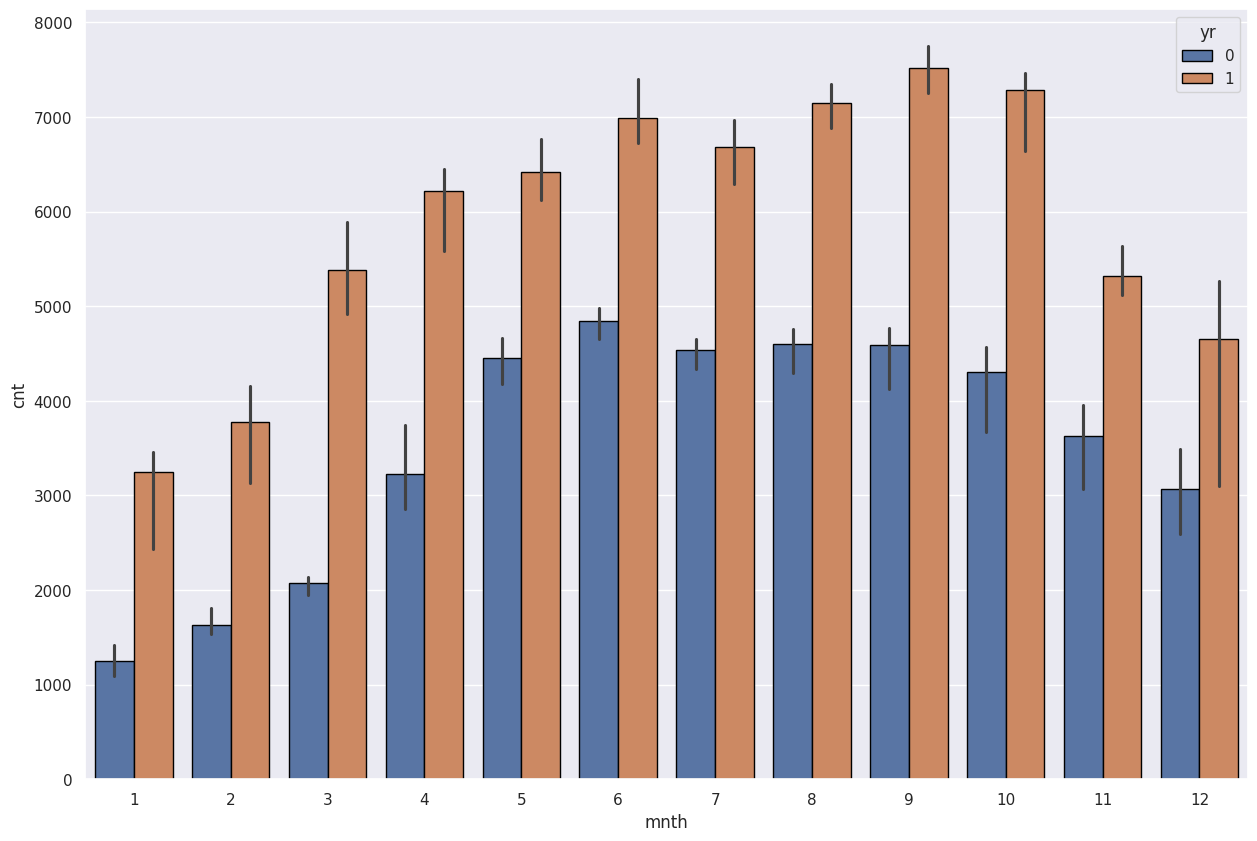

In [56]:
sns.barplot(x='mnth',y='cnt' , data=day, estimator='median', edgecolor='black', hue='yr')